In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

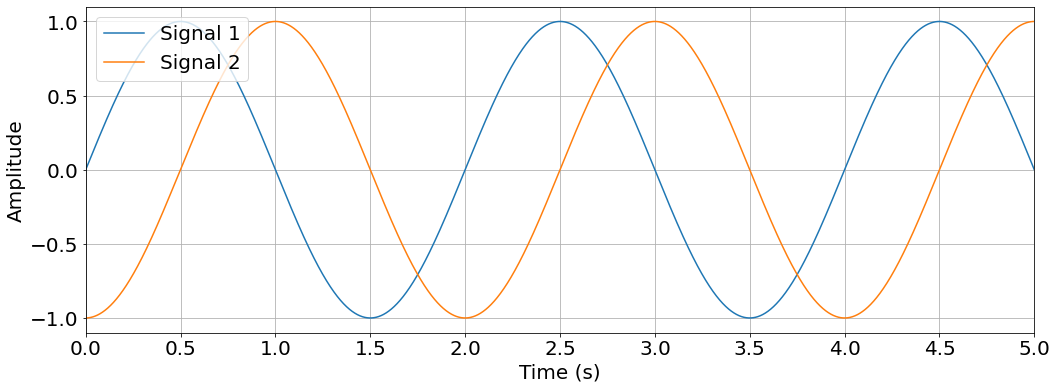

In [16]:
plt.figure(figsize=(17, 6))
matplotlib.rcParams.update({'font.size': 20})
x_ticks = np.arange(0, 6, 0.5)
plt.xticks(x_ticks)
plt.xlim(0, 5)
plt.grid(True)

#time = np.concatenate((np.linspace(0, 0, 1000), np.linspace(0, 2, 1000), np.linspace(0, 0, 1000), np.linspace(0, 0, 1000)))
time = np.linspace(0, 10, 10000)
freq = .5
fase_1 = 0.


time_1 = time
#y1 = np.sin((2*np.pi*freq*time) + fase1) + np.sin((2*np.pi*(freq+0.5)*time) + fase1)
signal_1 = np.sin((2*np.pi*freq*time) + fase_1)
plt.plot(time_1, signal_1, label="Signal 1")

fase_2 = 0.5

#time = np.concatenate((np.linspace(0, 0, 1000), np.linspace(0, 0, 1000), np.linspace(0, 2, 1000), np.linspace(0, 0, 1000)))
time_2 = time
signal_2 = np.roll(signal_1, 500)
#y2 = np.sin((2*np.pi*freq*time) + (fase2 * np.pi)) + np.sin((2*np.pi*(freq+0.5)*time) + (fase2 * np.pi))
#y2 = np.sin((2*np.pi*freq*time) + (fase2 * np.pi))
plt.plot(time_2, signal_2, label="Signal 2")
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend(loc = 'upper left' , frameon= True)
plt.savefig("../data/tdoa1.png" , format= "png", dpi = 72)



In [11]:
n = signal_2.shape[0] + signal_1.shape[0]
fft_signal_1 = np.fft.rfft(signal_1, n=n)
fft_signal_2 = np.fft.rfft(signal_2, n=n)
R = fft_signal_2 * np.conj(fft_signal_1)
ponderacao = R / np.abs(R)
cc = np.fft.irfft(ponderacao, n=n)

(10001,) (10001,)


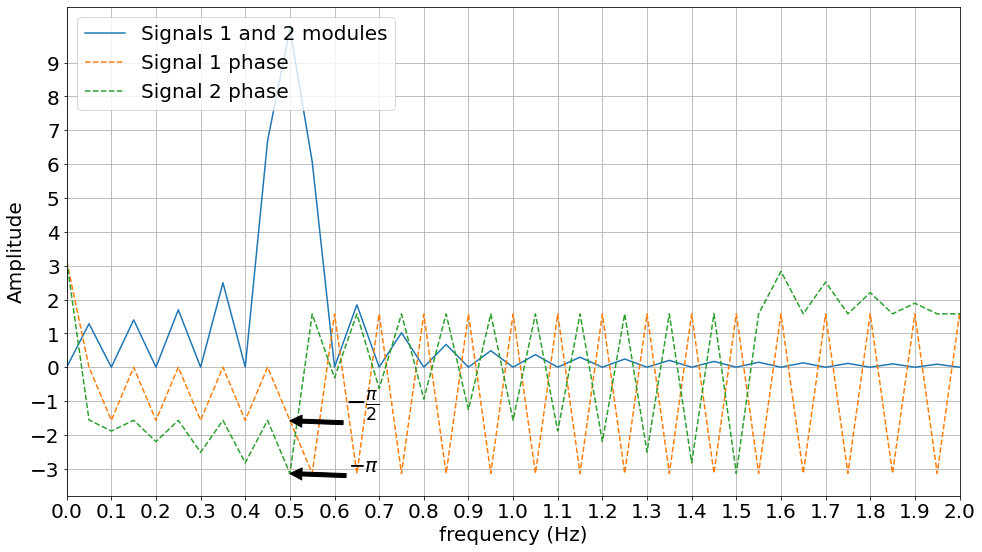

In [17]:
plt.figure(figsize=(16, 9))
matplotlib.rcParams.update({'font.size': 20})

ax = plt.subplot()
ax.annotate(r'$-\frac{\pi}{2}$', xy=(0.5, -1.58),  xycoords='data',
            xytext=(0.35, 0.22), textcoords='axes fraction', fontsize=25,
            arrowprops=dict(facecolor='black', shrink=0),
            horizontalalignment='right', verticalalignment='top',
            )

ax.annotate(r'$-\pi$', xy=(0.5, -3.14),  xycoords='data',
            xytext=(0.35, 0.08), textcoords='axes fraction', 
            arrowprops=dict(facecolor='black', shrink=0),
            horizontalalignment='right', verticalalignment='top',
            )
plt.grid(True)
x_ticks = np.arange(0, 3, 0.1)
plt.xticks(x_ticks)
plt.yticks(np.arange(-3, 10, 1))
xs1 = np.fft.rfftfreq(n, d=10/10000)
plt.xlim(0, 2)
print(xs1.shape, fft_signal_1.shape)
plt.plot(xs1,np.abs(fft_signal_1)/500, '-', label="Signals 1 and 2 modules")
plt.plot(xs1,np.angle(fft_signal_1), '--', label="Signal 1 phase")
plt.plot(xs1,np.angle(fft_signal_2), '--', label="Signal 2 phase")
plt.xlabel('frequency (Hz)')
plt.ylabel('Amplitude')
plt.legend(loc = 'upper left' , frameon= True)
plt.savefig("../data/tdoa2.png" , format= "png", dpi = 72)

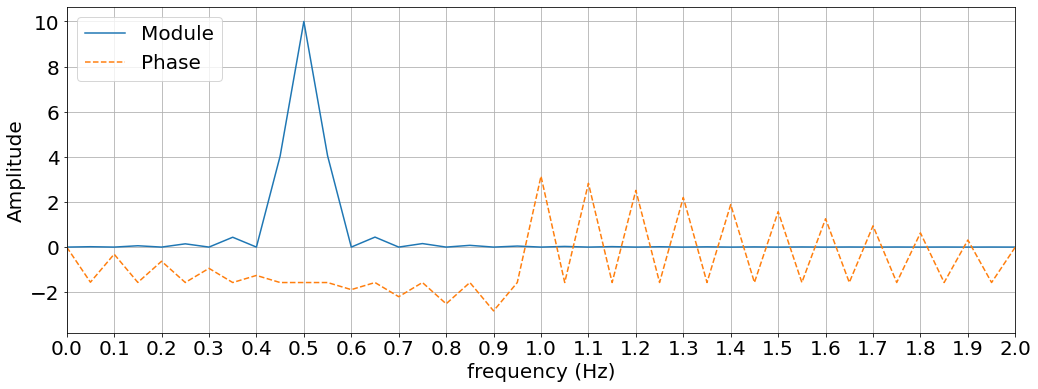

In [18]:
plt.figure(figsize=(17, 6))
matplotlib.rcParams.update({'font.size': 20})
plt.grid(True)
x_ticks = np.arange(0, 3, 0.1)
plt.xticks(x_ticks)
plt.xlim(0, 2)
plt.plot(xs1,np.abs(R)/2500000, '-', label="Module")
plt.plot(xs1,np.angle(R), '--', label="Phase")
plt.xlabel('frequency (Hz)')
plt.ylabel('Amplitude')
plt.legend(loc = 'upper left' , frameon= True)
plt.savefig("../data/tdoa3.png" , format= "png", dpi = 72)

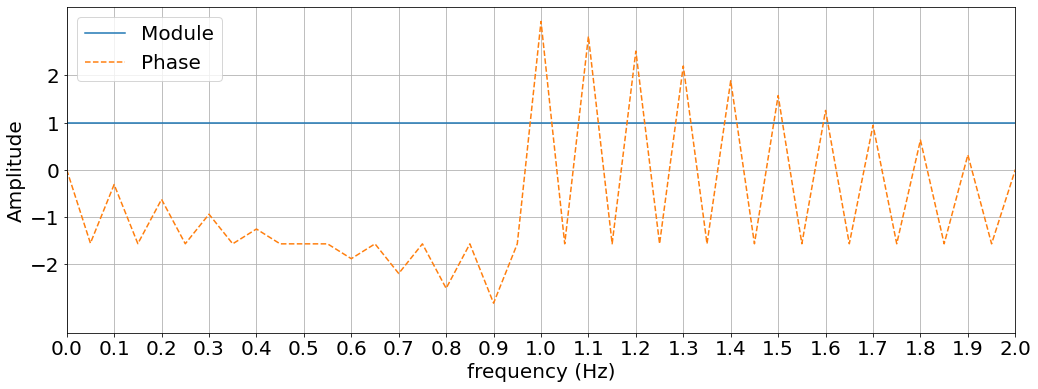

In [19]:
plt.figure(figsize=(17, 6))
matplotlib.rcParams.update({'font.size': 20})
plt.yticks(np.arange(-2, 3, 1))
plt.grid(True)
x_ticks = np.arange(0, 3, 0.1)
plt.xticks(x_ticks)
plt.xlim(0, 2)
plt.plot(xs1, np.abs(ponderacao), '-', label="Module")
plt.plot(xs1, np.angle(ponderacao), '--', label="Phase")
plt.xlabel('frequency (Hz)')
plt.ylabel('Amplitude')
plt.legend(loc = 'upper left' , frameon= True)
plt.savefig("../data/tdoa4.png" , format= "png", dpi = 72)

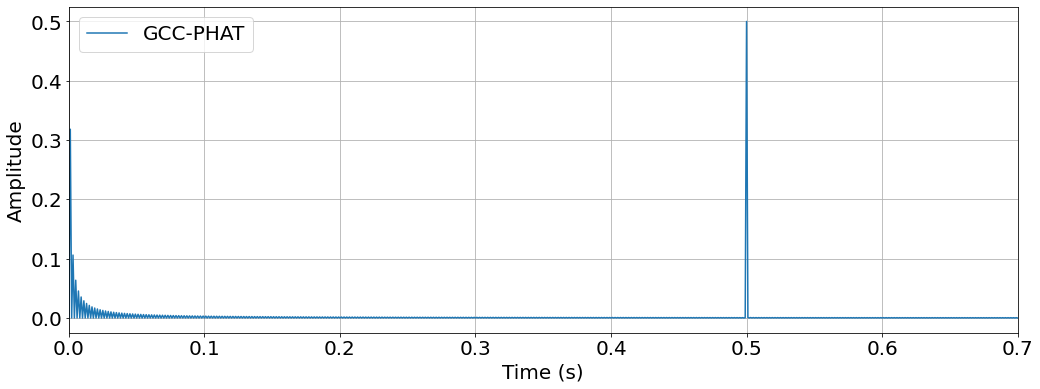

In [20]:
plt.figure(figsize=(17, 6))
matplotlib.rcParams.update({'font.size': 20})
plt.grid(True)
#x_ticks = np.arange(0, 50, 2)
#plt.xticks(x_ticks)
plt.xlim(0, .7)
plt.plot(np.linspace(0,20, 20000),np.abs(cc), '-', label="GCC-PHAT")
#plt.plot(np.angle(ponderacao), '--', label="Ponderação fase")
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend(loc = 'upper left' , frameon= True)
plt.savefig("../data/tdoa5.png" , format= "png", dpi = 72)